In [30]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [31]:
class Data(Dataset):
    def __init__(self, csv_file, y_name):
        """
            csv_file: string con la ruta al archivo csv
            y_name: string con el nombre de la columna a predecir
        """
        
        # Lectura del dataframe
        df = pd.read_csv(csv_file)

        # Construcción de 'X' e 'y'
        self.X = torch.tensor(df.loc[:, df.columns != y_name].values, dtype=torch.float32)
        self.y = torch.tensor(df.loc[:, y_name].values, dtype=torch.float32)
        
        self.len = self.X.shape[0]
    
    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
        

In [32]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [37]:
training_data = Data('train.csv', 'A21')
training_loader = DataLoader(training_data, batch_size=5)

validation_data = Data('validation.csv', 'A21')
validation_loader = DataLoader(validation_data, batch_size=5)

In [39]:
training_data[0][0].shape

torch.Size([50])

In [40]:
# Define softmax classifier class

class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [41]:
input_dim = 50
output_dim = 2

In [42]:
model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=50, out_features=2, bias=True)
)


In [43]:
print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([2, 50])
b:  torch.Size([2])


In [51]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=5)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5)

In [55]:
# Train the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in training_loader:
            print(x.shape)
            optimizer.zero_grad()
            z = model(x.view(-1, 50))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 50))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

torch.Size([5, 50])


RuntimeError: expected scalar type Long but found Float

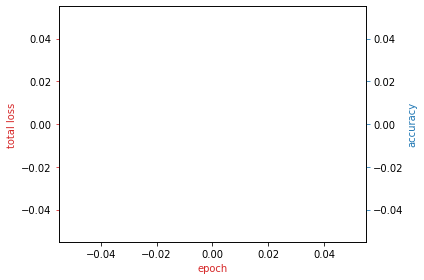

In [54]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()